In [1]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
happy = pd.read_csv('happy.csv')
happy 
happy= happy.rename({'Country name':'Country_name'},axis='columns')
# happy_score = happy['Country name','Regional indicator',"Ladder score"]
# happy_score

In [3]:
smokers = pd.read_csv('smokers.csv')
smokers
smokers = smokers[smokers["TIME"]==2014]
smokers = smokers.reset_index(drop=True)
smokers.head()
smokers = smokers.rename({'Country name':'Country_name'},axis='columns')
smokers= smokers.rename({'Value':'Value_smokers'},axis='columns')
smokers_score = smokers[['Country_name',"Value_smokers"]]
# smokers_score

In [4]:
suicide = pd.read_csv('suicide.csv',header = None)
# suicide.head()
suicide = suicide.drop(index=[0],axis=0)
# print(suicide.head())
dt2 = suicide.rename(columns=suicide.iloc[0])
dt2

suicide = dt2.drop(dt2.index[0])
suicide = suicide.reset_index(drop = True)
suicide = suicide.rename({'Country':'Country_name'},axis='columns')
suicide = suicide.rename({'2016':'Value_suicide'},axis='columns')
suicide.head()
suicide_score = suicide[['Country_name','Value_suicide']]
# suicide_score

In [5]:
alchol = pd.read_csv('alchol.csv')
alchol
alchol= alchol.rename({'Country name':'Country_name'},axis='columns')
alchol= alchol.rename({'Value_alchol':'Value_alchol'},axis='columns')
alchol_score = alchol[['Country_name',"Value_alchol"]]
# alchol_score


In [6]:
depression = pd.read_csv('depression.csv')
depression
depression= depression.rename({'Country name ':'Country_name'},axis='columns')
depression= depression.rename({'depression':'Value_depression'},axis='columns')
depression_score = depression
# depression_score = depression
# depression_score



In [7]:
timeuse = pd.read_csv('timeuse.csv')
timeuse

timeuse.dtypes
timeuse.keys()
timeuse = timeuse.rename({'Country':'Country_name'},axis='columns')
timeuse

,Country_name,travel to and from work/study,shopping,sleeping,eating & drinking,participating / attending events,sports,visiting or entertaining friends
0,Australia,25.017373,29.020153,512.355803,89.061849,6.004170,19.013204,40.006949
1,Austria,29.363549,20.732446,498.291623,78.836406,9.431552,32.078530,81.770630
2,Belgium,26.357791,28.595906,512.860239,98.516408,15.365886,21.016577,50.476242
3,Canada,28.790462,24.095448,520.000000,64.819713,5.605865,20.998791,53.476652
4,Denmark,23.050637,26.030903,488.607524,119.153410,7.439385,22.115072,81.371521
5,Estonia,29.423589,23.959773,530.015279,78.996207,7.861110,27.474674,37.624863
6,Finland,20.771330,26.156200,508.261100,80.645830,7.714292,37.230850,54.645980
7,France,22.930911,22.105101,512.974630,132.757108,14.842221,11.961101,55.201073
8,Germany,28.380100,32.090467,498.381500,94.963150,13.528252,26.435250,60.646950
9,Greece,24.650340,16.354267,500.032935,127.534109,5.086178,27.687648,56.327788


In [8]:
from scipy.stats import shapiro 
#정규성 문제 확인 
number  = shapiro(smokers_score["Value_smokers"])
number

# pvalue=0.4825419485569  > 0.05 보다 크므로 정규성에 문제가 없다.


(0.97971510887146, 0.817926824092865)

In [9]:
# pd.merge(happy,smokers_score,suicide_score)

total_1 = pd.merge(happy,suicide_score)
total_1['Value_suicide'] = pd.to_numeric(total_1['Value_suicide'])
# total_1


In [10]:
total_2 = pd.merge(happy,alchol_score)
total_2['Value_alchol'] = pd.to_numeric(total_2['Value_alchol'])
# total_2

In [11]:
total_3 = pd.merge(happy,smokers_score)
total_3['Value_smokers'] = pd.to_numeric(total_3['Value_smokers'])
# total_3

In [12]:
total_4= pd.merge(happy,depression_score,on="Country_name")
total_4['Value_depression'] = pd.to_numeric(total_4['Value_depression'])

In [13]:
total_5= pd.merge(suicide_score,depression_score,on="Country_name")
total_5['Value_depression'] = pd.to_numeric(total_5['Value_depression'])
total_5['Value_suicide'] = pd.to_numeric(total_5['Value_suicide'])


In [51]:
total_6 = pd.merge(happy,timeuse,on='Country_name')
total_6.head()

,Country_name,Regional indicator,Ladder score,travel to and from work/study,shopping,sleeping,eating & drinking,participating / attending events,sports,visiting or entertaining friends
0,Australia,North America and ANZ,7.2228,25.017373,29.020153,512.355803,89.061849,6.004170,19.013204,40.006949
1,Austria,Western Europe,7.2942,29.363549,20.732446,498.291623,78.836406,9.431552,32.078530,81.770630
2,Belgium,Western Europe,6.8635,26.357791,28.595906,512.860239,98.516408,15.365886,21.016577,50.476242
3,Canada,North America and ANZ,7.2321,28.790462,24.095448,520.000000,64.819713,5.605865,20.998791,53.476652
4,China,East Asia,5.1239,46.967384,19.986121,541.623872,99.930604,1.998612,22.984039,22.984039


In [15]:
total_score = pd.merge(happy,suicide_score,on="Country_name",how='left')
total_score = pd.merge(total_score,alchol_score,on="Country_name",how='left')
total_score = pd.merge(total_score,smokers_score,on="Country_name",how='left')
total_score = pd.merge(total_score,depression_score,on="Country_name",how='left')

total_score['Value_suicide'] = pd.to_numeric(total_score['Value_suicide'])

total_score = total_score.fillna(0)
total_score.head()

# oecd 153개국을 대상으로 조사함 

,Country_name,Regional indicator,Ladder score,Value_suicide,Value_alchol,Value_smokers,Value_depression
0,Afghanistan,South Asia,2.5669,6.4,0.0,0.0,9.19
1,Albania,Central and Eastern Europe,4.8827,5.6,0.0,0.0,5.11
2,Algeria,Middle East and North Africa,5.0051,3.3,0.0,0.0,4.12
3,Argentina,Latin America and Caribbean,5.9747,9.1,0.0,0.0,10.61
4,Armenia,Commonwealth of Independent States,4.6768,5.7,0.0,0.0,8.26
5,Australia,North America and ANZ,7.2228,11.7,0.0,0.0,11.05
6,Austria,Western Europe,7.2942,11.4,12.2,24.3,11.20
7,Azerbaijan,Commonwealth of Independent States,5.1648,2.6,0.0,0.0,4.07
8,Bahrain,Middle East and North Africa,6.2273,5.7,0.0,0.0,4.23
9,Bangladesh,South Asia,4.8328,6.1,0.0,0.0,6.03


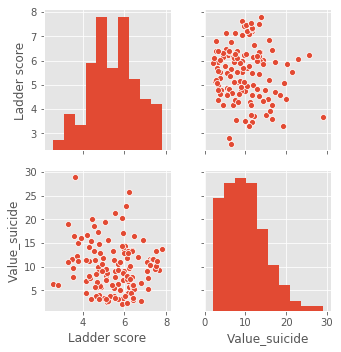

In [16]:
# from scipy.stats import shapiro 
# shapiro(total_1)
sns.pairplot(total_1)
plt.show()


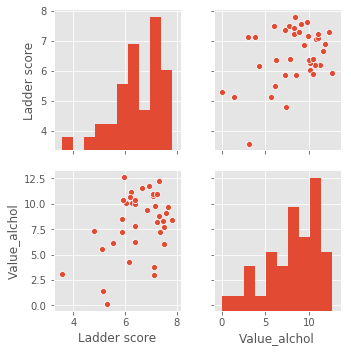

In [52]:
sns.pairplot(total_2)
plt.show()


C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


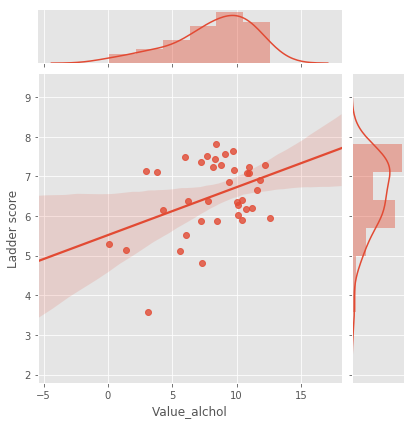

In [55]:
sns.jointplot(x=total_2['Value_alchol'],y=total_2['Ladder score'],kind='reg')

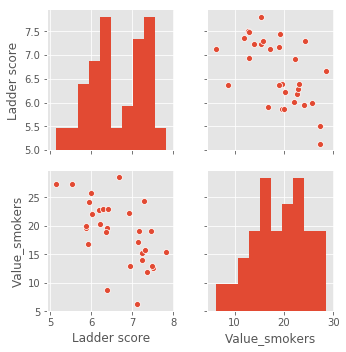

In [56]:
sns.pairplot(total_3)
plt.show()

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


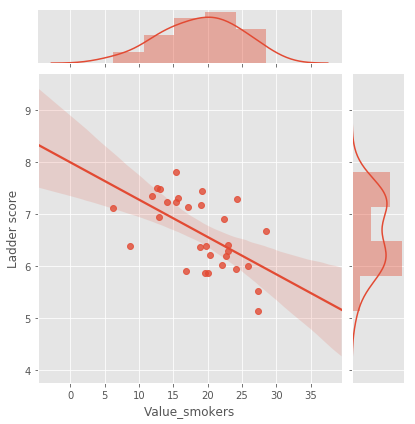

In [57]:
sns.jointplot(x=total_3['Value_smokers'],y=total_3['Ladder score'],kind='reg')

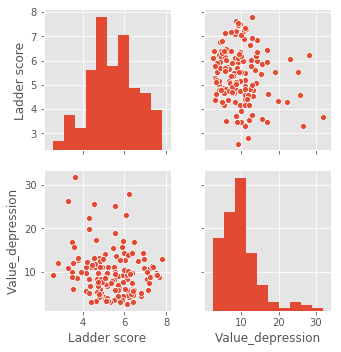

In [19]:
sns.pairplot(total_4)
plt.show()

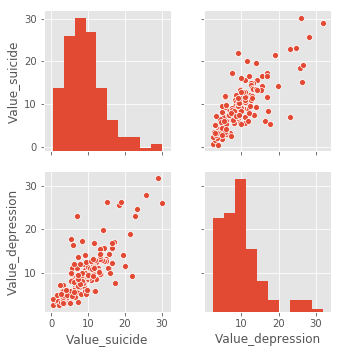

In [20]:
sns.pairplot(total_5)
plt.show()

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


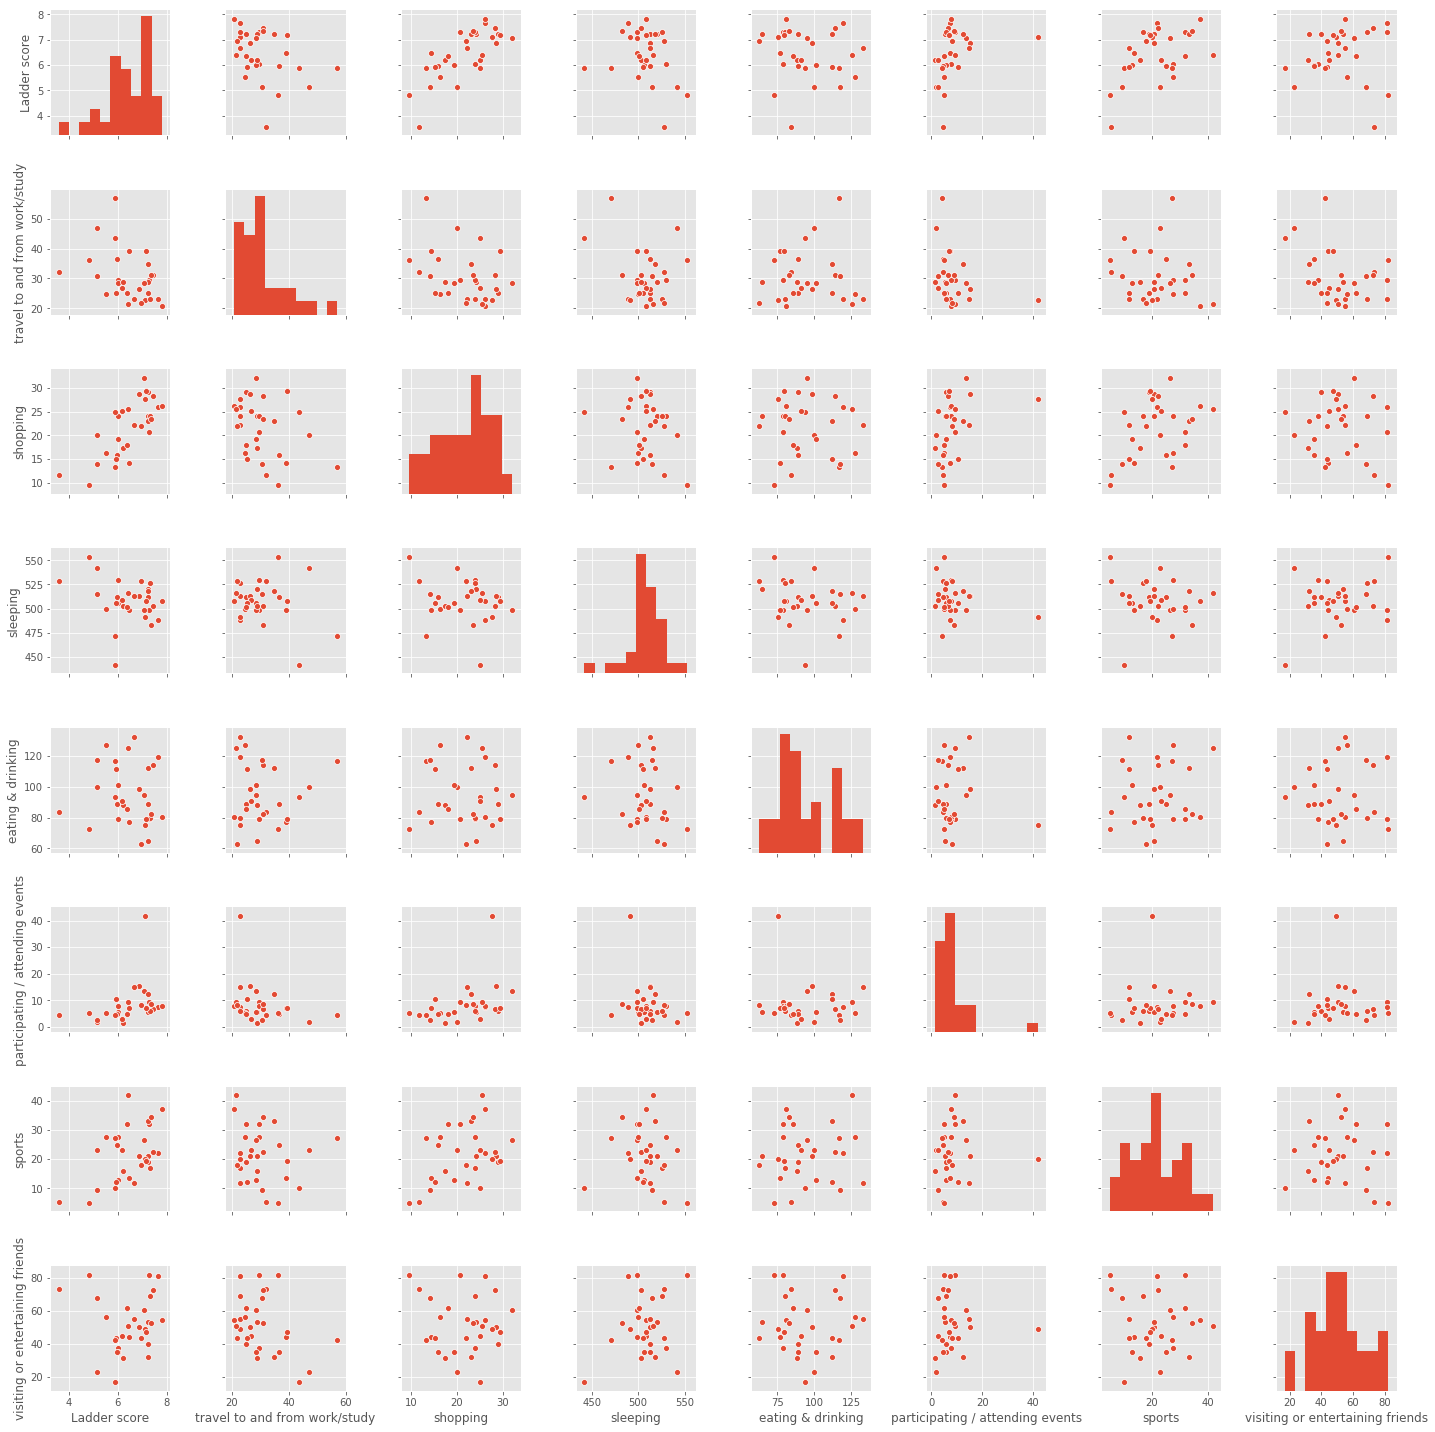

In [21]:
sns.pairplot(total_6)
plt.show()

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


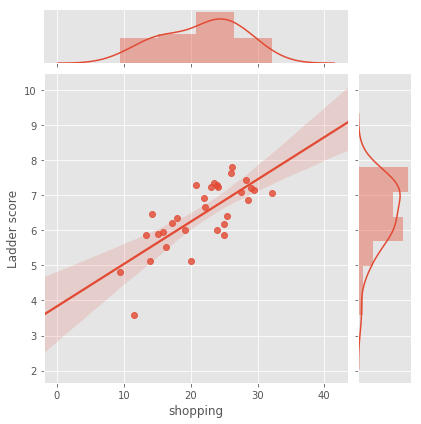

In [60]:
sns.jointplot(x=total_6['shopping'],y=total_6['Ladder score'],kind='reg')

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


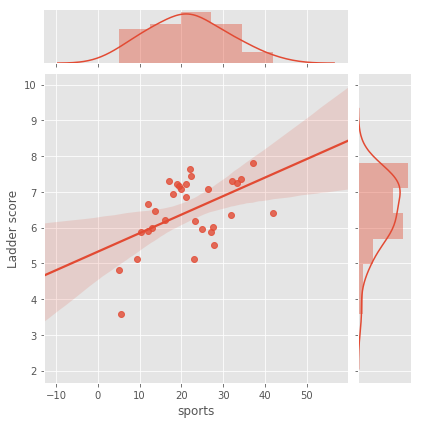

In [62]:
sns.jointplot(x=total_6['sports'],y=total_6['Ladder score'],kind='reg')

In [ ]:
sns.jointplot(x=total_6['shopping'],y=total_6['Ladder score'],kind='reg')

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'A group Histogram')

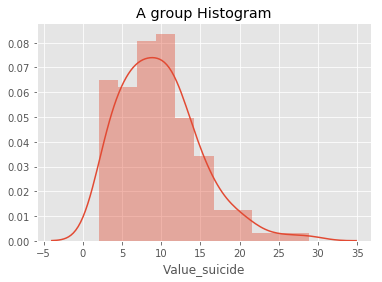

In [22]:
sns.distplot(total_1.Value_suicide)
plt.title('A group Histogram')
# plt.show()

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


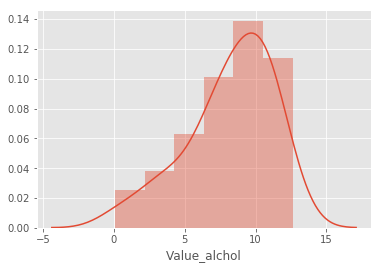

In [23]:
sns.distplot(total_2.Value_alchol)

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


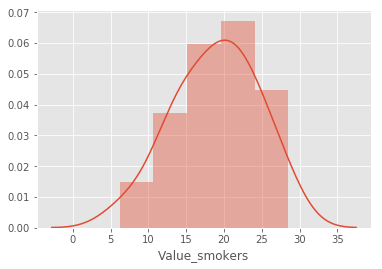

In [24]:
sns.distplot(total_3.Value_smokers)

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


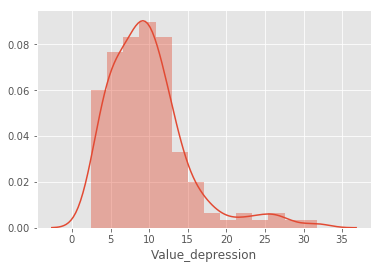

In [25]:
sns.distplot(total_4.Value_depression)

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


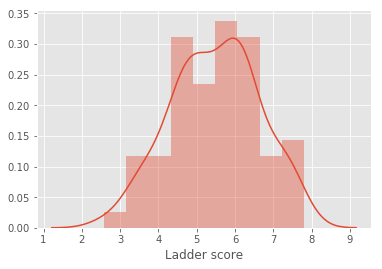

In [26]:
sns.distplot(total_1['Ladder score'])

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


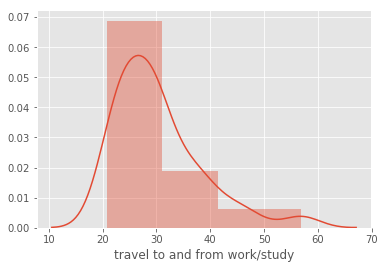

In [27]:
sns.distplot(total_6['travel to and from work/study'])

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


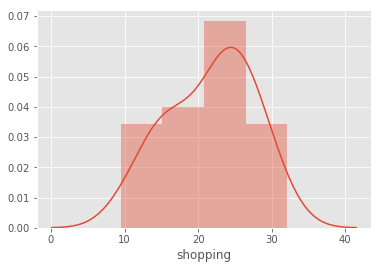

In [28]:
sns.distplot(total_6['shopping'])

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


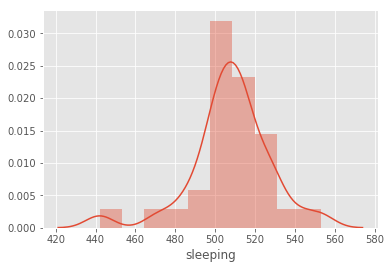

In [29]:
sns.distplot(total_6['sleeping'])

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


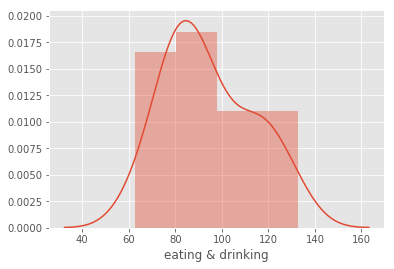

In [30]:
sns.distplot(total_6['eating & drinking'])

In [31]:
total_6.keys()

Index(['Country_name', 'Regional indicator', 'Ladder score',
       'travel to and from work/study', 'shopping', 'sleeping',
       'eating & drinking', 'participating / attending events', 'sports',
       'visiting or entertaining friends'],
      dtype='object')

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


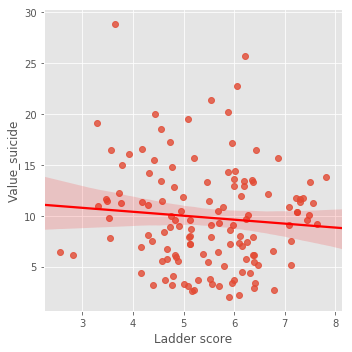

In [32]:
#자살률과 행복도의 관계
sns.lmplot(x="Ladder score", y="Value_suicide", data=total_1 , line_kws={'color':"red"})

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


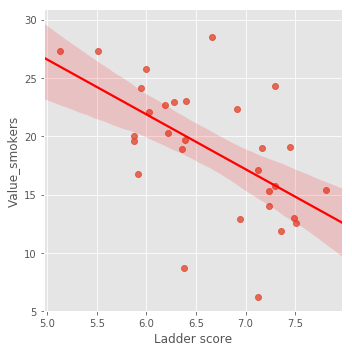

In [33]:
#행복도와 흡연과의 관계
sns.lmplot(x="Ladder score", y="Value_smokers", data=total_3, line_kws={'color':"red"})

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


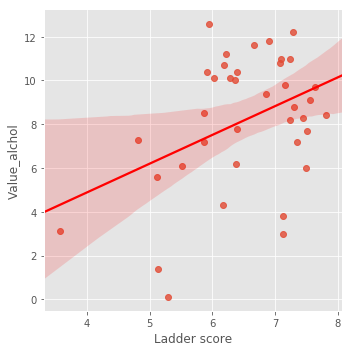

In [34]:
# 행복도과 음주소비와의 관계
sns.lmplot(x="Ladder score", y="Value_alchol", data=total_2 , line_kws={'color':"red"})

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


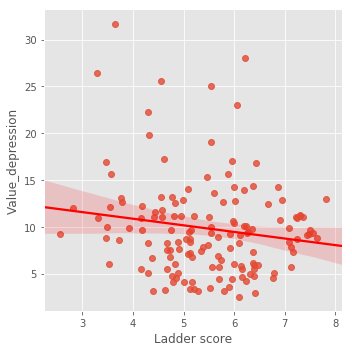

In [35]:
#행복도와 우울증의 상관관계 
sns.lmplot(x="Ladder score", y="Value_depression", data=total_4 , line_kws={'color':"red"})

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


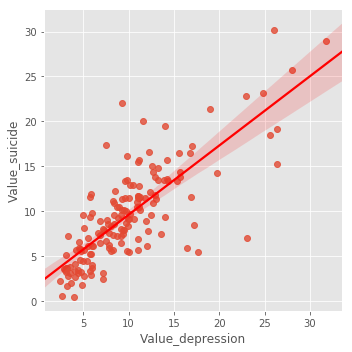

In [36]:
sns.lmplot(x="Value_depression", y="Value_suicide", data=total_5 , line_kws={'color':"red"})

In [37]:
total_5.corr()

,Value_suicide,Value_depression
Value_suicide,1.000000,0.786807
Value_depression,0.786807,1.000000


In [38]:
# 술먹으면 행복하고 담배하면 불행하고 , 사실 행복과 자살은 크게 관련이 없지만 음의 관계는 약간있을 수 있다.
# ?????????????????

In [39]:
# 대륙별 차이?를 확인해봐라 
total_score['Value_depression'].head()

0     9.19
1     5.11
2     4.12
3    10.61
4     8.26
Name: Value_depression, dtype: float64

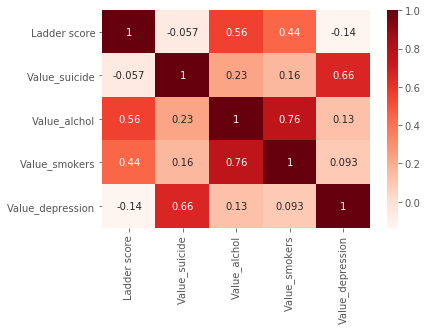

In [40]:
sns.heatmap(total_score.corr(), annot=True, cmap="Reds")
plt.show()



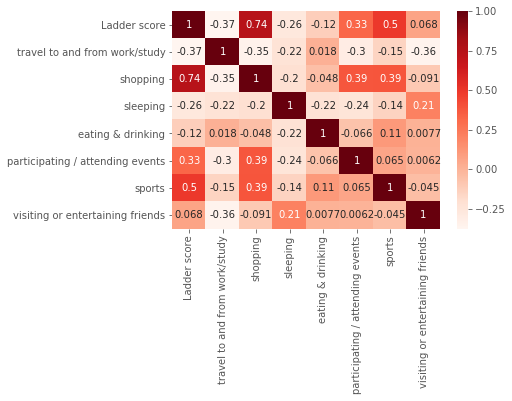

In [41]:
sns.heatmap(total_6.corr(), annot=True, cmap="Reds")
plt.show()


In [42]:
total_score.cov()

,Ladder score,Value_suicide,Value_alchol,Value_smokers,Value_depression
Ladder score,1.237145,-0.370904,2.394962,3.907182,-0.836018
Value_suicide,-0.370904,33.873800,5.146343,7.253301,21.272411
Value_alchol,2.394962,5.146343,14.867454,23.189258,2.784294
Value_smokers,3.907182,7.253301,23.189258,62.515125,4.060375
Value_depression,-0.836018,21.272411,2.784294,4.060375,30.775689


In [43]:
total_6.corr()

,Ladder score,travel to and from work/study,shopping,sleeping,eating & drinking,participating / attending events,sports,visiting or entertaining friends
Ladder score,1.000000,-0.373837,0.743190,-0.261687,-0.116794,0.325630,0.499810,0.068342
travel to and from work/study,-0.373837,1.000000,-0.348938,-0.219024,0.017845,-0.300477,-0.145023,-0.356222
shopping,0.743190,-0.348938,1.000000,-0.200382,-0.048143,0.386427,0.393298,-0.091313
sleeping,-0.261687,-0.219024,-0.200382,1.000000,-0.216109,-0.239228,-0.140034,0.213359
eating & drinking,-0.116794,0.017845,-0.048143,-0.216109,1.000000,-0.065678,0.112951,0.007670
participating / attending events,0.325630,-0.300477,0.386427,-0.239228,-0.065678,1.000000,0.065191,0.006203
sports,0.499810,-0.145023,0.393298,-0.140034,0.112951,0.065191,1.000000,-0.044574
visiting or entertaining friends,0.068342,-0.356222,-0.091313,0.213359,0.007670,0.006203,-0.044574,1.000000


C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


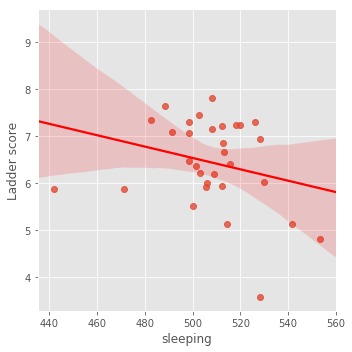

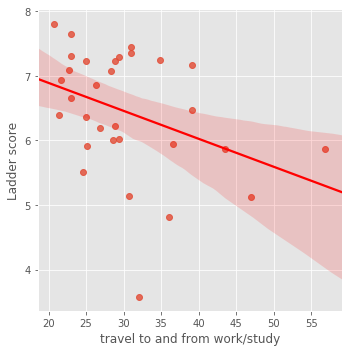

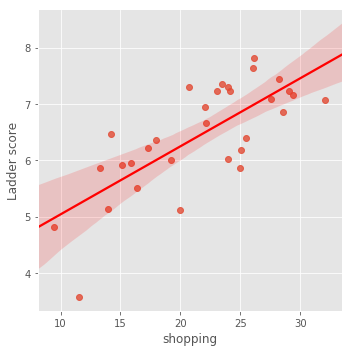

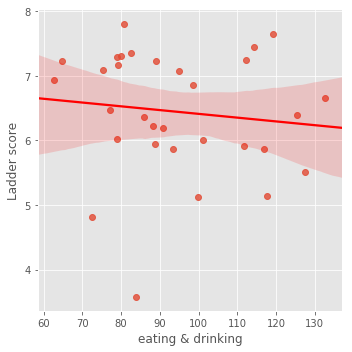

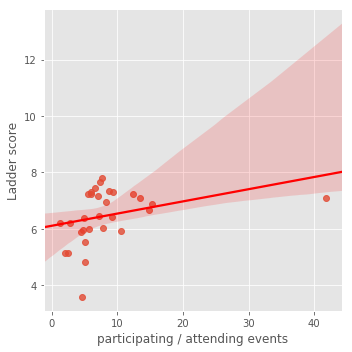

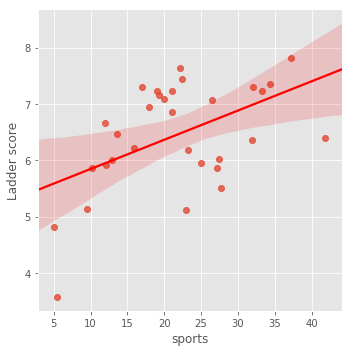

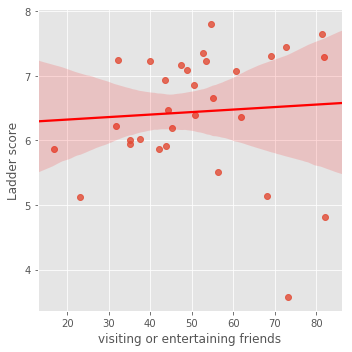

In [44]:
sns.lmplot(x="sleeping", y="Ladder score", data=total_6 , line_kws={'color':"red"})
sns.lmplot(x="travel to and from work/study", y="Ladder score", data=total_6 , line_kws={'color':"red"})
sns.lmplot(x="shopping", y="Ladder score", data=total_6 , line_kws={'color':"red"})
sns.lmplot(x="eating & drinking", y="Ladder score", data=total_6 , line_kws={'color':"red"})
sns.lmplot(x="participating / attending events", y="Ladder score", data=total_6 , line_kws={'color':"red"})
sns.lmplot(x="sports", y="Ladder score", data=total_6 , line_kws={'color':"red"})
sns.lmplot(x="visiting or entertaining friends", y="Ladder score", data=total_6 , line_kws={'color':"red"})

In [45]:
timeuse.head()

,Country_name,travel to and from work/study,shopping,sleeping,eating & drinking,participating / attending events,sports,visiting or entertaining friends
0,Australia,25.017373,29.020153,512.355803,89.061849,6.004170,19.013204,40.006949
1,Austria,29.363549,20.732446,498.291623,78.836406,9.431552,32.078530,81.770630
2,Belgium,26.357791,28.595906,512.860239,98.516408,15.365886,21.016577,50.476242
3,Canada,28.790462,24.095448,520.000000,64.819713,5.605865,20.998791,53.476652
4,Denmark,23.050637,26.030903,488.607524,119.153410,7.439385,22.115072,81.371521


In [46]:
timeuse.corr()

,travel to and from work/study,shopping,sleeping,eating & drinking,participating / attending events,sports,visiting or entertaining friends
travel to and from work/study,1.000000,-0.371517,-0.220999,-0.038648,-0.282321,-0.194949,-0.374062
shopping,-0.371517,1.000000,-0.180181,0.014907,0.366820,0.425200,-0.063461
sleeping,-0.220999,-0.180181,1.000000,-0.168695,-0.235616,-0.113851,0.207957
eating & drinking,-0.038648,0.014907,-0.168695,1.000000,-0.079583,0.194999,0.042415
participating / attending events,-0.282321,0.366820,-0.235616,-0.079583,1.000000,0.042456,-0.003280
sports,-0.194949,0.425200,-0.113851,0.194999,0.042456,1.000000,0.003026
visiting or entertaining friends,-0.374062,-0.063461,0.207957,0.042415,-0.003280,0.003026,1.000000


In [47]:
total_6.corr()

,Ladder score,travel to and from work/study,shopping,sleeping,eating & drinking,participating / attending events,sports,visiting or entertaining friends
Ladder score,1.000000,-0.373837,0.743190,-0.261687,-0.116794,0.325630,0.499810,0.068342
travel to and from work/study,-0.373837,1.000000,-0.348938,-0.219024,0.017845,-0.300477,-0.145023,-0.356222
shopping,0.743190,-0.348938,1.000000,-0.200382,-0.048143,0.386427,0.393298,-0.091313
sleeping,-0.261687,-0.219024,-0.200382,1.000000,-0.216109,-0.239228,-0.140034,0.213359
eating & drinking,-0.116794,0.017845,-0.048143,-0.216109,1.000000,-0.065678,0.112951,0.007670
participating / attending events,0.325630,-0.300477,0.386427,-0.239228,-0.065678,1.000000,0.065191,0.006203
sports,0.499810,-0.145023,0.393298,-0.140034,0.112951,0.065191,1.000000,-0.044574
visiting or entertaining friends,0.068342,-0.356222,-0.091313,0.213359,0.007670,0.006203,-0.044574,1.000000


In [48]:
import scipy.stats as stats
stats.skew(total_6['travel to and from work/study'])  #첨도 확인 


1.4029242415124157

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


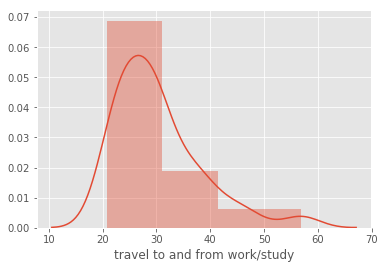

In [49]:
sns.distplot(total_6['travel to and from work/study'])

In [50]:
from statsmodels.formula.api import ols 
res = ols('sleeping ~ sports+shopping',total_6 ).fit()
res.summary()                    #선형 회귀 분석 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               sleeping   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.6534
Date:                Wed, 11 Nov 2020   Prob (F-statistic):              0.528
Time:                        09:04:34   Log-Likelihood:                -136.46
No. Observations:                  31   AIC:                             278.9
Df Residuals:                      28   BIC:                             283.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    524.2910     14.950     35.070      0.000     493.668     554.914
sports        -0.1621      0.450     -0.360      0.721      -1.083       0.759
shopping      -0.6026      0.704     -0.856      0.399      -2.045       0.840
==============================================================================
Omnibus:                       11.983   Durbin-Watson:                   2.359
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.782
Skew:                          -1.053   Prob(JB):                      0.00168
Kurtosis:                       5.337   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""